In [1]:
import pandas as pd
import seaborn as sns

# Alignment dataset available at /scratch/bi01/miladim/LocalAlignment/RNAzScreens/
ssv_length_file = './Results-forward-20181023-inout_lens_aln_settings.ssv'
df_lens = pd.read_csv(ssv_length_file, sep="\s+",names=["left-cont","right-cont","input","aln","file","left-cont","right-cont","input","aln","file","left-cont","right-cont","input","aln","file"])

/home/milad/miniconda3/envs/LocalAlignment/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [2]:
df_lens.iloc[0]['file'].split('/')[2], df_lens.iloc[0]['file.1'].split('/')[2], df_lens.iloc[0]['file.2'].split('/')[2]

('glob-opt-pen0', 'glob-opt-pen0-sw100', 'glob-opt-pen15')

In [3]:
df_lens['input-minus-context'] = df_lens['input'] - df_lens['left-cont'] - df_lens['right-cont']
df_lens.rename({'aln':'pen-0_sw-200','aln.1':'pen-0_sw-100','aln.2':'pen-15-sw200'}, inplace=True,axis=1)

In [4]:
df_lens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 16 columns):
left-cont              287 non-null int64
right-cont             287 non-null int64
input                  287 non-null int64
pen-0_sw-200           287 non-null int64
file                   287 non-null object
left-cont.1            287 non-null int64
right-cont.1           287 non-null int64
input.1                287 non-null int64
pen-0_sw-100           287 non-null int64
file.1                 287 non-null object
left-cont.2            287 non-null int64
right-cont.2           287 non-null int64
input.2                287 non-null int64
pen-15-sw200           287 non-null int64
file.2                 287 non-null object
input-minus-context    287 non-null int64
dtypes: int64(13), object(3)
memory usage: 36.0+ KB


4
4
0 0 (-13.875, 568.875) (-0.00033715893845639907, 0.007261731644523852)
0 1 (-13.875, 568.875) (-13.875, 568.875)
0 2 (-13.875, 568.875) (-13.875, 568.875)
0 3 (83.25, 366.75) (-13.875, 568.875)
4
1 0 (-13.875, 568.875) (-13.875, 568.875)
1 1 (-13.875, 568.875) (-0.00036303335277191874, 0.00775342906201674)
1 2 (-13.875, 568.875) (-13.875, 568.875)
1 3 (83.25, 366.75) (-13.875, 568.875)
4
2 0 (-13.875, 568.875) (-13.875, 568.875)
2 1 (-13.875, 568.875) (-13.875, 568.875)
2 2 (-13.875, 568.875) (-0.0004592704389431072, 0.009708465074048897)
2 3 (83.25, 366.75) (-13.875, 568.875)
4
3 0 (-13.875, 568.875) (83.25, 366.75)
3 1 (-13.875, 568.875) (83.25, 366.75)
3 2 (-13.875, 568.875) (83.25, 366.75)
3 3 (83.25, 366.75) (-0.0007676483228835768, 0.016993610716922184)


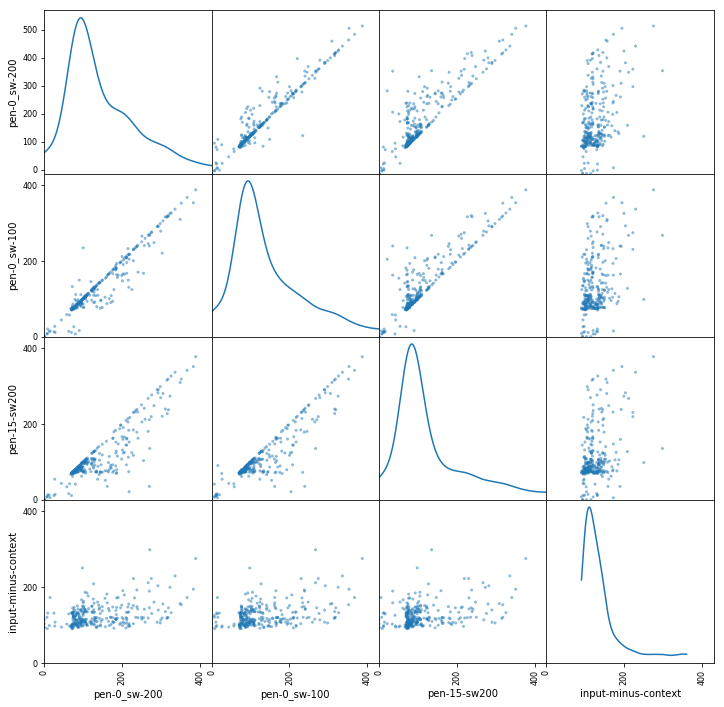

In [39]:
# sns.distplot(df_lens,'aln','aln.1')
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
axarr = scatter_matrix(df_lens[[#'input',
                                'pen-0_sw-200','pen-0_sw-100','pen-15-sw200','input-minus-context']],
               figsize=(12, 12), diagonal='kde',alpha=0.5)
# df_lens.plot('aln','aln.1')
print(len(axarr))
for ia, a in enumerate(axarr):
    print(len(a))
    for iaa, aa in enumerate(a):
        print(ia, iaa, aa.get_xlim(), aa.get_ylim())
        aa.set_xlim(0,430)
        
        aa.set_xticks([0,200,400])
        if ia != iaa:
            aa.set_yticks([0,200,400])
            aa.set_ylim(0,430)
plt.savefig('./len-matrix.png',dpi=300)

In [6]:
scatter_matrix?